<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_Coding_Dojo_Track2/blob/main/Data_split_KNN_LN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Split Tested in Knn and Linear Regression
# By Felipe Villegas

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
df=pd.read_csv('/content/drive/MyDrive/CodingDojo/Track 2/Semana 5/Tareas Core/abalone.data')
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [67]:
# nombres= pd.read_csv('/content/drive/MyDrive/CodingDojo/Track 2/Semana 5/Tareas Core/abalone.names', on_bad_lines='skip')
# nombres.head()

In [68]:
# nombres.to_numpy()
# the names are actually explicit in the webside so we will ignore this and the previous code

In [69]:
df.isna().sum()
# the data frame is complete

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [70]:
# Naming the columns: 
df.columns = ['Sex', 'Length(mm)', 'Diameter(mm)', 'Height(mm)', 'Whole Weight(gr)', 'Shucked Weight(gr)', 'Viscera Weight(gr)', 'Shell Weight(gr)', 'Rings']
df.head()
# Aditional Data about the features of the Df by column
# Name / Data Type / Measurement Unit / Description

# Sex / nominal / -- / M, F, and I (infant)
# Length / continuous / mm / Longest shell measurement
#Diameter / continuous / mm / perpendicular to length
# Height / continuous / mm / with meat in shell
# Whole weight / continuous / grams / whole abalone
# Shucked weight / continuous / grams / weight of meat
# Viscera weight / continuous / grams / gut weight (after bleeding)
# Shell weight / continuous / grams / after being dried
# Rings / integer / -- / +1.5 gives the age in years

# Here We realize that we need to calculate and generate another feature column of the age by the Rings

,Sex,Length(mm),Diameter(mm),Height(mm),Whole Weight(gr),Shucked Weight(gr),Viscera Weight(gr),Shell Weight(gr),Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [71]:
# Afterwards we set the target variable in the df by creating the new column of the feature 'Age'
df = df.assign(Age = lambda x: (x['Rings']+1.5))
df.head()
# We could also have used the method .apply which is usefull when operating with multiple rows and columns conditions 
# df.apply(lambda row: row.Rings + 1.5, axis=1)
# and then by naming the new feature-variable-column 
# df['Age'] = df.apply(lambda row: row.Rings + 1.5, axis=1)

,Sex,Length(mm),Diameter(mm),Height(mm),Whole Weight(gr),Shucked Weight(gr),Viscera Weight(gr),Shell Weight(gr),Rings,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4176 non-null   object 
 1   Length(mm)          4176 non-null   float64
 2   Diameter(mm)        4176 non-null   float64
 3   Height(mm)          4176 non-null   float64
 4   Whole Weight(gr)    4176 non-null   float64
 5   Shucked Weight(gr)  4176 non-null   float64
 6   Viscera Weight(gr)  4176 non-null   float64
 7   Shell Weight(gr)    4176 non-null   float64
 8   Rings               4176 non-null   int64  
 9   Age                 4176 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.4+ KB


# KNN Age Prediction Without Split

In [73]:
# Selection of the training data base, its important to only select the cuantitavie variables
AgeFeatures= ['Length(mm)',
               'Diameter(mm)',
               'Height(mm)',
               'Whole Weight(gr)',
               'Shucked Weight(gr)',
               'Viscera Weight(gr)',
               'Shell Weight(gr)']
XAge = df.loc[:, AgeFeatures].to_numpy()

In [74]:
XAge.shape

(4176, 7)

In [75]:
# Assigning of the target vector y: 
# Do not mistake to add  extra [] to name the column of the target
yAge = df.loc[:, 'Age'].to_numpy()
yAge.shape

(4176,)

In [76]:
# we Scalate XAge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(XAge)
# Transform XAge
XAge = scaler.transform(XAge);

In [77]:
# We assign the KNN model to a variable
KnnAge = KNeighborsRegressor(n_neighbors=5)
print(KnnAge)

KNeighborsRegressor()


In [78]:
# Training the prediction model
KnnAge.fit(XAge, yAge)

KNeighborsRegressor()

In [79]:
# Then we execute the prediction with: knn.predict(XAge) but to actually see the predictions we need to assign the results to a variable
PredictedAges= KnnAge.predict(XAge)
PredictedAges

array([ 8.5, 11.1, 10.9, ..., 12.5, 11.5, 12.7])

In [80]:
score = KnnAge.score(XAge, yAge)
score
# the 65.8% of the Variation in the Age is due to the Features selected in the XAge training matrix 

0.6582492859136977

In [81]:
mean_absolute_error(yAge, PredictedAges)

1.3319444444444444

In [82]:
mean_squared_error(yAge, KnnAge.predict(XAge))

3.5504885057471265

In [83]:
np.sqrt(mean_squared_error(yAge,KnnAge.predict(XAge)))

1.8842739996473779

# Linear Regression Age Prediction Without Split

In [84]:
# Checking the Shape of the Df 
df.shape

(4176, 10)

In [85]:
# We also check the changes made by calling the Nan Values
df.isna().sum()
# At this point we can conclude that the df is already cleaned 

Sex                   0
Length(mm)            0
Diameter(mm)          0
Height(mm)            0
Whole Weight(gr)      0
Shucked Weight(gr)    0
Viscera Weight(gr)    0
Shell Weight(gr)      0
Rings                 0
Age                   0
dtype: int64

In [86]:
# Furthermore we check for the correlation of the variables in order to adress which of them are going to be usefull for our analysis 
df.corr()
# And Sort the values in order to make it more friendly to the eyesight analysis
df.corr().sort_values(by = ['Age'])

,Length(mm),Diameter(mm),Height(mm),Whole Weight(gr),Shucked Weight(gr),Viscera Weight(gr),Shell Weight(gr),Rings,Age
Shucked Weight(gr),0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256,0.421256
Viscera Weight(gr),0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274,0.504274
Whole Weight(gr),0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818,0.540818
Length(mm),1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123,0.557123
Height(mm),0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109,0.558109
Diameter(mm),0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005,0.575005
Shell Weight(gr),0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000,1.000000
Age,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000,1.000000


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

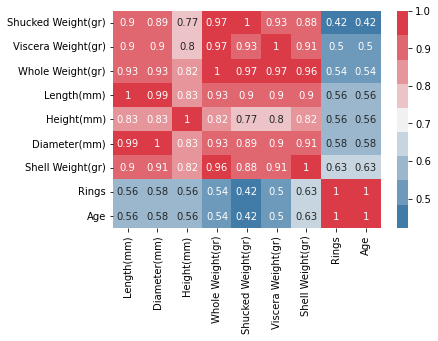

In [88]:
# To visualize better
sns.heatmap(df.corr().sort_values(by = ['Age']), cmap = sns.diverging_palette(240, 10, n=9),
            annot=True)

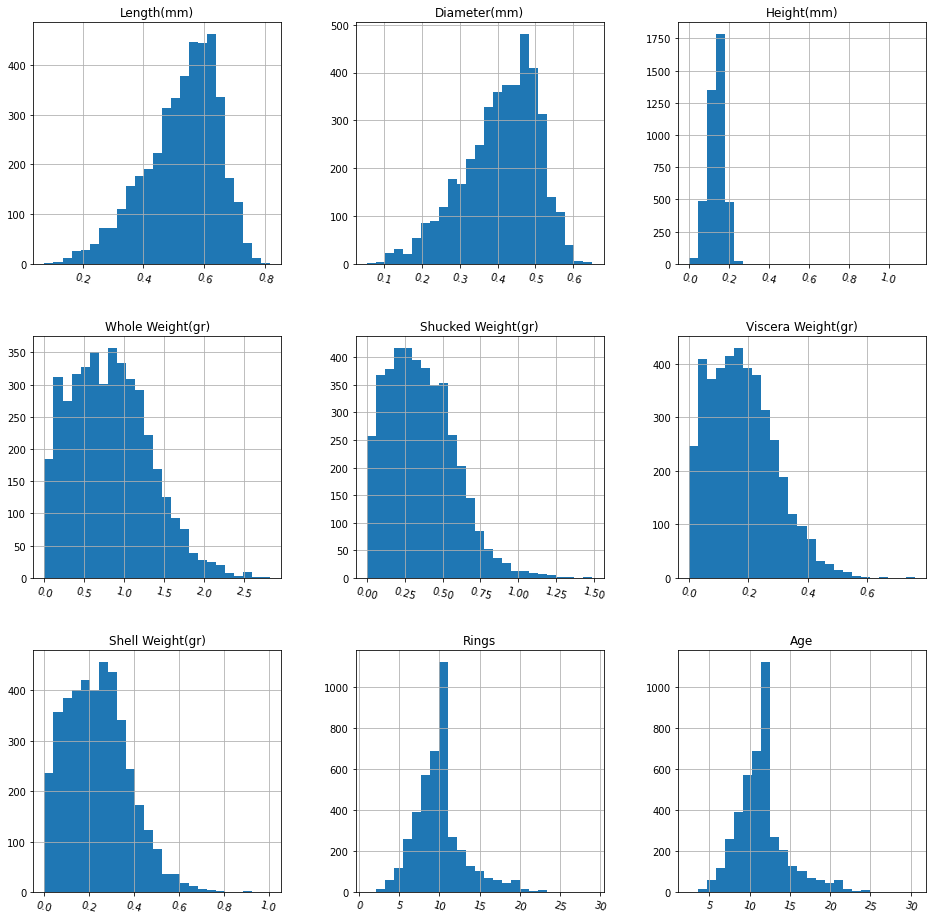

In [89]:
# then we check for unusual values in the df with a graphic analysis by using histograms
df.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);
# We realize that there are atypical values at the price (negative prices) so there is a problem to solve

In [90]:
# Create the instance 
Regression = LinearRegression(fit_intercept=True)
# then execute the model for it to learn about the relation between X and y 
Regression.fit(XAge,yAge)

LinearRegression()

# Now we predict

In [91]:
# this returns us the result of what will the price be by the change of one unit on each of the variables
# here the Model learns the parameters to define the linear ecuation that we graphic before and will help us predict future values
Regression.predict(XAge[0].reshape(-1,7))
# -1 infer the number of rows
# in the reshape step we need to tell the model the shape of the array in order for it to predict, otherwise, it will consider a one feature array 
# and shoot an error cause we actually inserted a 7 feature array 

array([8.73511859])

In [92]:
# This returns us an array of what the prices would be in the first 10 samples
Regression.predict(XAge[0:10])

array([ 8.73511859, 12.34265211, 10.76886354,  8.48590333,  9.61576227,
       14.80799311, 12.70115089, 10.80255542, 14.4450575 , 12.43216067])

In [93]:
# Then we calculate the R squared to understand how accurate is our model to predict, this value oscilates between 0 and one 
# being one the best possible model to predict
score = Regression.score(XAge, yAge)
print(score)

0.5282432555640287


In [94]:
# returns the slope of each evaluated X
Regression.coef_
# underscore means that you cant access the attribute until after the model is already fitted

array([-0.18155692,  1.31575348,  0.49768953,  4.53093091, -4.48542206,
       -1.07503248,  1.19527956])

In [95]:
Regression.intercept_

11.432471264367814

In [96]:
m1 = Regression.coef_[0]
m2 = Regression.coef_[1]
m3 = Regression.coef_[2]
m4 = Regression.coef_[3]
m5 = Regression.coef_[4]
m6 = Regression.coef_[5]
m7 = Regression.coef_[6]
b = Regression.intercept_
# these are the variables that define the slope
print("formula: y = {:.2f}*Length(mm) + {:.2f}*Diameter(mm) + {:.2f}*Height(mm) + {:.2f}*Whole Weight(gr) + {:.2f}*Shucked Weight(gr) + {:.2f}*Viscera Weight(gr) + {:.2f}*Shell Weight(gr) + {:.2f}".format(m1,m2,m3,m4,m5,m6,m7,b))

formula: y = -0.18*Length(mm) + 1.32*Diameter(mm) + 0.50*Height(mm) + 4.53*Whole Weight(gr) + -4.49*Shucked Weight(gr) + -1.08*Viscera Weight(gr) + 1.20*Shell Weight(gr) + 11.43


In [97]:
# In order to Adress the MAE and the MSE we need to ser a variable for our predictions, to save them, so that the model could use the results to calculate these errors
Predictions = Regression.predict(XAge)
Predictions
# it should return a 1 d numpy array with the predictions

array([ 8.73511859, 12.34265211, 10.76886354, ..., 12.38315987,
       11.11609597, 12.54151169])

In [98]:
mean_absolute_error(yAge, Predictions)

1.6076280277596602

In [99]:
mean_squared_error(yAge,Regression.predict(XAge))

4.901136499763453

In [100]:
np.sqrt(mean_squared_error(yAge,Regression.predict(XAge)))

2.2138510563638767

# KNN Splited Dataframe

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(XAge, yAge, random_state=3)

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
KnnAge.fit(X_train, y_train)

KNeighborsRegressor()

In [105]:
SplitPredictions = KnnAge.predict(X_train)
SplitPredictions

array([10.9, 11.7, 11.5, ..., 12.1, 13.1, 11.5])

In [106]:
KNNtest_predictions = KnnAge.predict(X_test)
KNNtest_predictions

array([11.1, 13.1, 14.1, ...,  8.3,  8.5, 10.7])

In [123]:
# Train
KNNSplitscore = KnnAge.score(X_train, y_train)
KNNSplitscore

0.6555512962081227

In [124]:
# Test
KNNSplitscore = KnnAge.score(X_test, y_test)
KNNSplitscore

0.4714544304886764

In [108]:
mean_absolute_error(y_test, KNNtest_predictions)

1.5668582375478928

In [109]:
mean_squared_error(y_test,KnnAge.predict(X_test))

4.6659386973180075

In [110]:
np.sqrt(mean_squared_error(y_test,KnnAge.predict(X_test)))

2.1600784007341045

# Linear Regression Splited Data frame 

In [111]:
# Create the instance 
SplitRegression = LinearRegression(fit_intercept=True)
# then execute the model for it to learn about the relation between X and y 
SplitRegression.fit(X_train, y_train)

LinearRegression()

In [112]:
# this returns us the result of what will the price be by the change of one unit on each of the variables
# here the Model learns the parameters to define the linear ecuation that we graphic before and will help us predict future values
SplitRegression.predict(X_train[0].reshape(-1,7))
# -1 infer the number of rows
# in the reshape step we need to tell the model the shape of the array in order for it to predict, otherwise, it will consider a one feature array 
# and shoot an error cause we actually inserted a 3 feature array 

array([11.52529996])

In [113]:
# This returns us an array of what the prices would be in the first 10 samples
SplitRegression.predict(X_train[0:10])

array([11.52529996, 11.25098434, 10.3650196 , 11.66825013, 15.12209708,
       15.68616373, 14.64316165, 11.65829531,  7.26465979, 17.54330077])

In [114]:
# Train 
Split_LR_score = Regression.score(X_train, y_train)
print(Split_LR_score)

0.5269238892658437


In [122]:
# Test
Split_LR_score = Regression.score(X_test, y_test)
print(Split_LR_score)

0.5247078403117267


In [115]:
# returns the slope of each evaluated X
SplitRegression.coef_
# underscore means that you cant access the attribute until after the model is already fitted

array([-0.34002557,  1.4807177 ,  0.44245294,  4.58070382, -4.57244422,
       -0.99243926,  1.23543184])

In [116]:
SplitRegression.intercept_

11.53448275862069

In [117]:
# In order to Adress the MAE and the MSE we need to ser a variable for our predictions, to save them, so that the model could use the results to calculate these errors
Split_LR_Predictions = Regression.predict(X_test)
Predictions

array([ 8.73511859, 12.34265211, 10.76886354, ..., 12.38315987,
       11.11609597, 12.54151169])

In [118]:
mean_absolute_error(y_test, Split_LR_Predictions)

1.5169610272329754

In [119]:
mean_squared_error(y_test,SplitRegression.predict(X_test))

4.2481699256072805

In [120]:
np.sqrt(mean_squared_error(y_test,SplitRegression.predict(X_test)))

2.0611089067798627

# Summary Score and Errors

## Without Split 

### **KNN**
### **Score: 0.6582492859136977**
### **Mean Absolute Error: 1.3319444444444444**
### **Mean SQuared Error: 3.9313601532567053**


### Linear Regression
### Score: 0.5282432555640287
### Mean Absolute Error: 1.6076280277596602
### Mean SQuared Error: 4.901136499763453


## With Split

### KNN
### Score: 0.4714544304886764
### Mean Absolute Error: 1.5668582375478928
### Mean SQuared Error: 4.6659386973180075


### Linear Regression
### Score: 0.5247078403117267
### Mean Absolute Error: 4.2481699256072805
### Mean SQuared Error:4.2481699256072805



# **¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando no usaste la división entrenar probar?**
### KNN ya que el R2 es superior y por lo tanto un mayor acierto del modelo

# **¿Cuál de KNN o regresión lineal pareció un mejor modelo cuando usaste la división entrenar probar?**
### Linear Regression ya que el R2 es superior y por lo tanto un mayor acierto del modelo adicionalmente, el modelo de Linear Regression esta menos over fitted que el KNN comparando el R2 de los Train y Test analisis.

# **¿Hubo alguna ventaja en la regresión lineal en términos de la cantidad de código que tenías que escribir?**
### En regresion lineal no hay necesidad de escalar

# **¿Hay alguna forma de mostrarle a alguien cuál de los dos modelos fue más efectivo?**
### En efecto comparando los indicadores del R2 y el error absoluto medio, a mayor r cuadrado y menor error mejor sera el modelo. 

# **¿Crees que podrías haber mejorado KNN para mejorar la eficacia del modelo?**

### El modelo de KNN se puede mejorar encontrando el numero mas adecuado a ser asignado al N numero de vecinos mas cercanos